# Movies Data Analysis 🎥

Preparing Required Libraries 📚

In [209]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

This is an one time style notebook charts

In [210]:
# Chart colors
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["#525df4","#ed4a7b","#087783","#3c6372"]) 
# Chart Background
mpl.rcParams['axes.facecolor'] = "#e4f2ffaa"

# Quick title
def plot(x = "", y = "", title = ""):
  plt.title(title)
  plt.xlabel(x)
  plt.ylabel(y)

Importing Data ⏬

In [211]:
data = pd.read_csv("tmdb-movies.csv")

### Introduction 🧐📊

Let's Deep Dive in Data Set 🧐📊

In [212]:
data.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


Data Definition ❔:
- Numeric Data
  - `popularity`, `budget_adj`, `revenue_adj`, `release_year`, `vote_count`, `vote_average`, `runtime`
- Labeled Data
  - `director`, `genres`, `production_companies`, `cast`, `original_title`, `keywords`

Questions ❔:
- Revenue 🤑 
  - How release year effects on revenue?
  - Which directors make heighest revenue?
  - Which production companies make highest revenue?
  - Which Genres makes highest revenue?
- Vote Count and Genres 🤼
  - What is most repeated genres in data
  - Genres vs vote count
  - Genres vs popularity
  - Directors vs Vote Count

### Cleaning 🧼👊

id, imdb_id, homepage, tagline, overview, budget, revenue are not important let's drop them 🗑

In [213]:
data = data.drop(['id', 'imdb_id', 'homepage', 'tagline', 'overview', "budget", "revenue"], axis=1)

data.head(6)

,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,9.110700,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,father-son relationship|rape|based on novel|mo...,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08


Let's start discovering if there is missid data

In [214]:
data.isna().sum()

popularity                 0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

There is a missing values in `cast`, `director`, `keywords`, `genres`, `production_companies`

So I will replace all these missing values with `"MD"` which means Missing Data

In [215]:
data.fillna("MD", inplace=True)

In [216]:
data.isna().sum()

popularity              0
original_title          0
cast                    0
director                0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

Let's See if Budget does not have any problems 🧐

<Axes: >

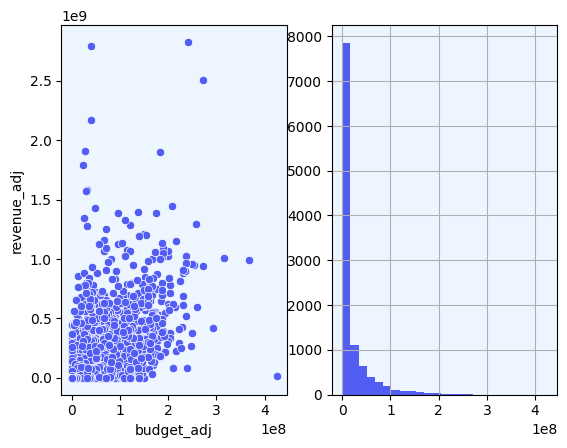

In [217]:
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'budget_adj', y = 'revenue_adj', data= data)
plt.subplot(1, 2, 2)
data["budget_adj"].hist(bins=25)

There is a lot of outliers 'Data Errors' 🙄 As there is `budget` / `revenue` values equal zero = So we need Data Cleaning 🧼

In [218]:
data[data["budget_adj"] < 30000]["budget_adj"].shape[0]

5771

There are about `5780` of entries have budget lower than `30K` which is not logical **so I will seperate this data**

In [219]:
data_more_30k = data[data["budget_adj"] >= 30000]

data_less_30k = data[data["budget_adj"] < 30000]

<Axes: xlabel='budget_adj', ylabel='revenue_adj'>

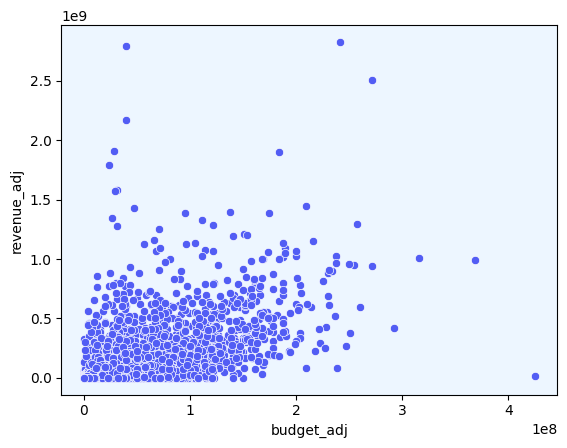

In [220]:
sns.scatterplot(x = 'budget_adj', y = 'revenue_adj', data= data_more_30k)

As Genres are Grouped, I will seperate it

In [221]:
# Splitting Genres
genre_dummies = data["genres"].str.get_dummies()
# Counting Genres per movies
genre_dummies["Genres_Per_Movie"] = genre_dummies.sum(axis=1)
# DataSet with Genres
data_with_genres = pd.concat([genre_dummies, data], axis=1)

### EDA 📊👨‍💻🕵️‍♂️

#### Revenue 🤑

Let's See The Revenues that the movies companies makes Every Year

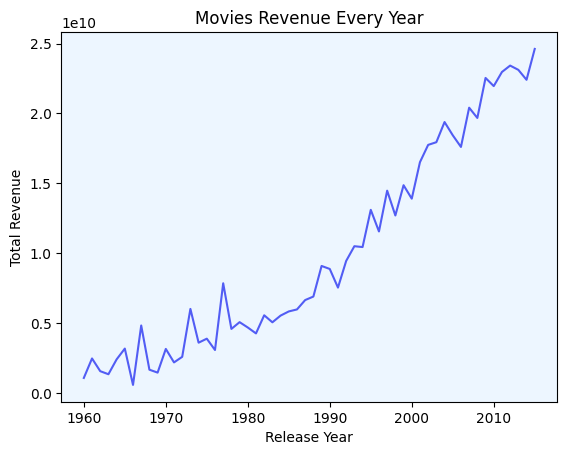

In [222]:
filter = data.groupby("release_year")["revenue_adj"].sum()

plot("Release Year", "Total Revenue", "Movies Revenue Every Year")
plt.plot(filter)

Revenue of Movies are growing massively every year

Let's see top movies that makes large `revenue` according to `Genres`

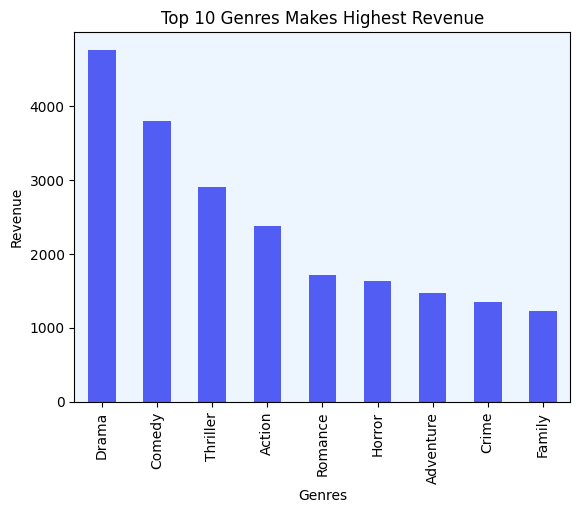

In [223]:
genre_dummies.sum().sort_values(ascending=False).head(10)[1::].plot(kind="bar")
plot("Genres", "Revenue", "Top 10 Genres Makes Highest Revenue")

`Drama` and `Comedy` are in the sky 🤯

Let's see Top Director, Pro Companies makes revenue

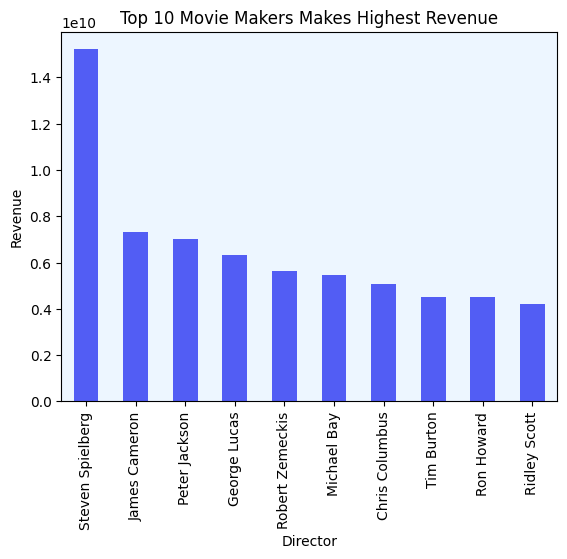

In [224]:
data.groupby("director")['revenue_adj'].sum().sort_values(ascending=False).head(10).plot(kind="bar")
plot("Director", "Revenue", "Top 10 Movie Makers Makes Highest Revenue")

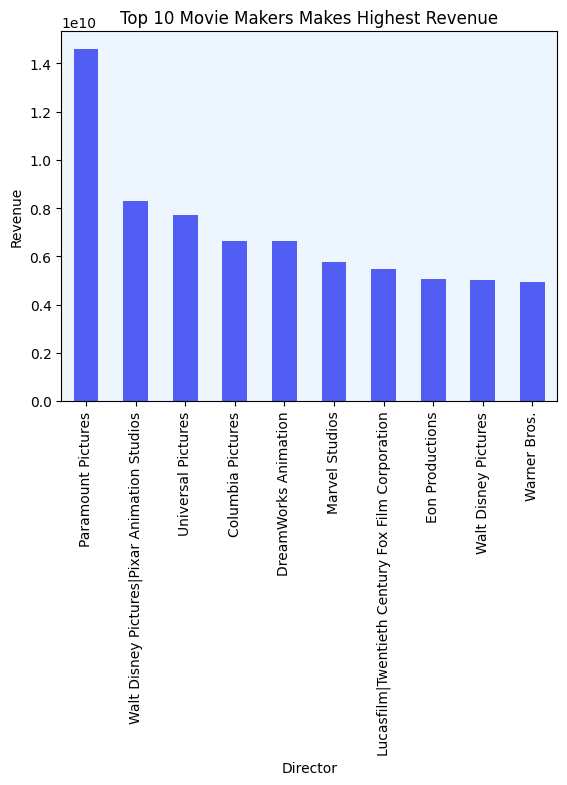

In [225]:
data.groupby("production_companies")['revenue_adj'].sum().sort_values(ascending=False).head(10).plot(kind="bar")
plot("Director", "Revenue", "Top 10 Movie Makers Makes Highest Revenue")

#### 	votes 🤼

Let's See The spread of Genres in our data

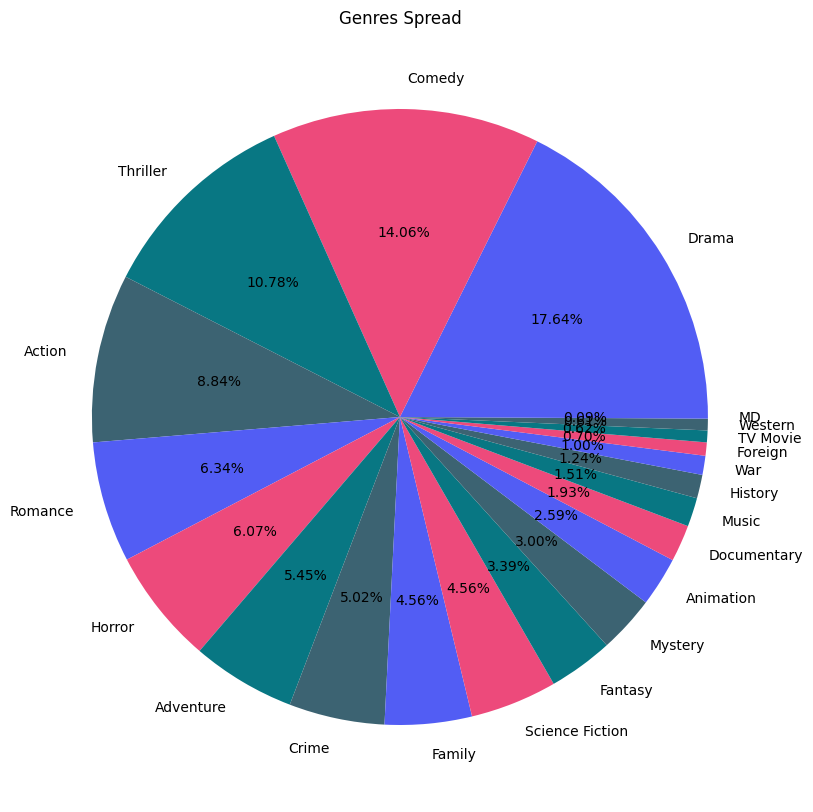

In [226]:
genre_dummies.sum().sort_values(ascending=False)[1::].plot(kind="pie", figsize=(20, 10), autopct='%1.2f%%')
plot(title="Genres Spread")

let's see top three Genres votes counts

<Axes: >

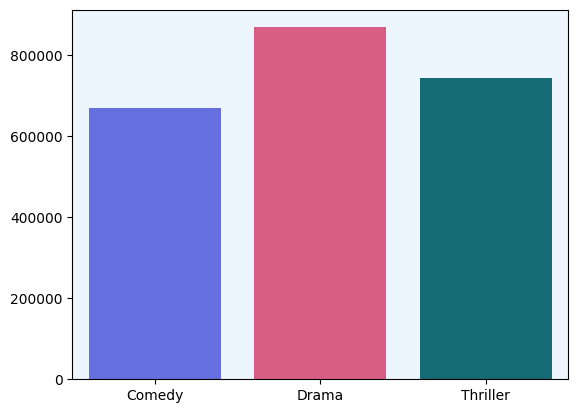

In [227]:
vote_counts_genres = {
  "Comedy": data_with_genres.groupby('Comedy')['vote_count'].sum()[1],
  "Drama": data_with_genres.groupby('Drama')['vote_count'].sum()[1],
  "Thriller": data_with_genres.groupby('Thriller')['vote_count'].sum()[1]
}

vote_counts_genres_df = pd.DataFrame([vote_counts_genres])

sns.barplot(vote_counts_genres_df)


Let's see Top 5 Genres according to popularity

<Axes: >

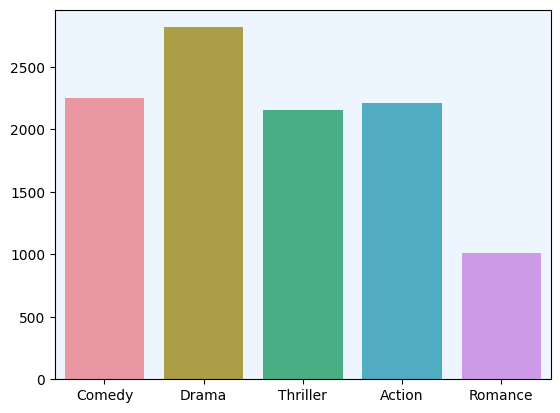

In [228]:
popularity_genres = {
  "Comedy": data_with_genres.groupby('Comedy')['popularity'].sum()[1],
  "Drama": data_with_genres.groupby('Drama')['popularity'].sum()[1],
  "Thriller": data_with_genres.groupby('Thriller')['popularity'].sum()[1],
  "Action": data_with_genres.groupby('Action')['popularity'].sum()[1],
  "Romance": data_with_genres.groupby('Romance')['popularity'].sum()[1]
}

popularity_genres_df = pd.DataFrame([popularity_genres])

sns.barplot(popularity_genres_df)

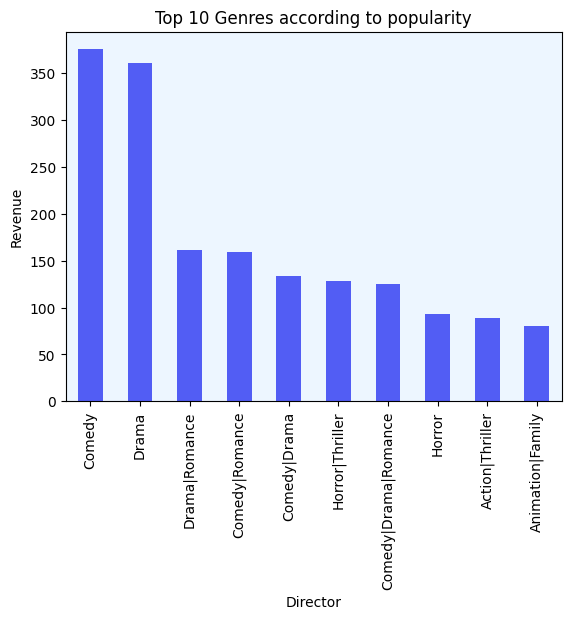

In [229]:
data.groupby("genres")['popularity'].sum().sort_values(ascending=False).head(10).plot(kind="bar")
plot("Director", "Revenue", "Top 10 Genres according to popularity")

Let's see the top 10 directors takes higher vote count

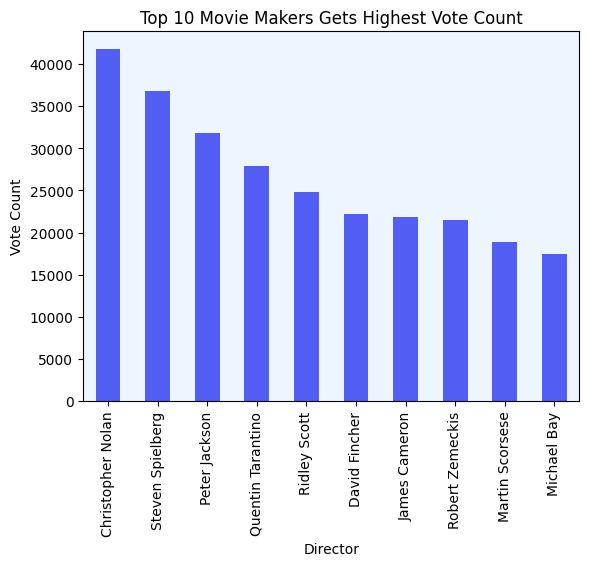

In [230]:
data.groupby("director")['vote_count'].sum().sort_values(ascending=False).head(10).plot(kind="bar")
plot("Director", "Vote Count", "Top 10 Movie Makers Gets Highest Vote Count")

### Conclusions 🤔

- Every year Movies makes more and more `Revenues` and costs more `Budget`
- `Drama`, `Comedy` and `Thiller` are the highest repeated Genres and also the highest Budget and Revenues
- `Steven Spielberg` is the first director according to Revenue while `Christopher Nolan` is the first according to vote counts
- `Paramount Pictures` and `Walt Disney Pictures|Pixar Animation Studios` are the best Movie Companies according to Revenue

One of the most limitation in this dataset that it does not provide the `languages` or the `target contries` of the Movies. Which make it difficult to analyze according to the targeted countries of audience